# Тема: Модели регрессии

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_openml

## 1. (1 балл) Загрузите предложенный вам датасет с помощью функции sklearn.datasets.fetch_openml. Выведите текстовое описание загруженного датасета. бозначьте целевую переменную за `y`, а остальные данные за `X`.

In [ ]:
dataset = fetch_openml(name='debutanizer', version=1)
print(dataset.DESCR)

&quot;The debutanizer column is part of a desulfuring and naphtha splitter plant.&quot;

u1 Top temperature
u2 Top pressure
u3 Reflux flow
u4 Flow to next process
u5 6th tray temperature
u6 Bottom temperature
u7 Bottom temperature
y Butane content in the debutanizer bottoms (Naphtha splitter feed)

See Appendix A.3 of Fortuna, L., Graziani, S., Rizzo, A., Xibilia, M.G. &quot;Fortuna, L., Graziani, S., Rizzo, A., Xibilia, M.G.&quot; (Springer 2007) for more info.

Downloaded from openml.org.


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = dataset.data
X

,u1,u2,u3,u4,u5,u6,u7
0,0.268900,0.650894,0.832742,0.583420,0.784759,0.843079,0.822079
1,0.268483,0.650140,0.852153,0.577510,0.776487,0.838605,0.822079
2,0.267967,0.659657,0.823618,0.571600,0.764546,0.807879,0.786246
3,0.267451,0.668338,0.808371,0.565689,0.752605,0.799606,0.786246
4,0.266935,0.647191,0.761948,0.559779,0.745326,0.773122,0.746142
...,...,...,...,...,...,...,...
2389,0.284859,0.645894,0.688723,0.355109,0.615583,0.608848,0.500866
2390,0.266139,0.665503,0.665640,0.354275,0.588834,0.582074,0.508999
2391,0.247419,0.665706,0.664740,0.353441,0.561301,0.602186,0.523348
2392,0.228699,0.672975,0.677300,0.352607,0.530730,0.636970,0.537697


In [ ]:
Y = dataset.target
Y

0       0.180295
1       0.177124
2       0.173618
3       0.171640
4       0.166972
          ...   
2389    0.188976
2390    0.178992
2391    0.169742
2392    0.159023
2393    0.149922
Name: y, Length: 2394, dtype: float64

In [ ]:
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
data['target'] = dataset.target
data

,u1,u2,u3,u4,u5,u6,u7,target
0,0.268900,0.650894,0.832742,0.583420,0.784759,0.843079,0.822079,0.180295
1,0.268483,0.650140,0.852153,0.577510,0.776487,0.838605,0.822079,0.177124
2,0.267967,0.659657,0.823618,0.571600,0.764546,0.807879,0.786246,0.173618
3,0.267451,0.668338,0.808371,0.565689,0.752605,0.799606,0.786246,0.171640
4,0.266935,0.647191,0.761948,0.559779,0.745326,0.773122,0.746142,0.166972
...,...,...,...,...,...,...,...,...
2389,0.284859,0.645894,0.688723,0.355109,0.615583,0.608848,0.500866,0.188976
2390,0.266139,0.665503,0.665640,0.354275,0.588834,0.582074,0.508999,0.178992
2391,0.247419,0.665706,0.664740,0.353441,0.561301,0.602186,0.523348,0.169742
2392,0.228699,0.672975,0.677300,0.352607,0.530730,0.636970,0.537697,0.159023


## 2. (1 балл) Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам.

In [ ]:
type(dataset)

sklearn.utils._bunch.Bunch

In [ ]:
data.describe()

,u1,u2,u3,u4,u5,u6,u7,target
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,0.283894,0.667847,0.598467,0.435948,0.658086,0.620741,0.589397,0.267788
std,0.103143,0.057690,0.198581,0.138237,0.127054,0.165116,0.173251,0.158943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224004,0.653819,0.500390,0.363369,0.608661,0.481804,0.445001,0.169188
50%,0.263995,0.671915,0.624269,0.396288,0.694644,0.639585,0.600959,0.246857
75%,0.325607,0.690943,0.742784,0.518144,0.730119,0.755050,0.741387,0.318061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X.shape, Y.shape

((2394, 7), (2394,))

## 3. (1 балл) Выведите тип данных каждого признака и целевой переменной. Убедитесь, что в данных все признаки являются числовыми. В случае, если это не так, удалите нечисловые колонки.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   u1      2394 non-null   float64
 1   u2      2394 non-null   float64
 2   u3      2394 non-null   float64
 3   u4      2394 non-null   float64
 4   u5      2394 non-null   float64
 5   u6      2394 non-null   float64
 6   u7      2394 non-null   float64
 7   target  2394 non-null   float64
dtypes: float64(8)
memory usage: 149.8 KB


Все колонки float - числовые, ничего удалять и менять не надо.

## 4. (1 балл) Убедитесь, что нет пропущенных значений в данных и у целевой переменной. В случае, если это не так, заполните пропуски медианными значениями

In [ ]:
data.isnull().sum()

u1        0
u2        0
u3        0
u4        0
u5        0
u6        0
u7        0
target    0
dtype: int64

Убедились, что нет пустых

## 5. (1 балл) Постройте гистограмму распределения целевой переменной. Сделайте вывод по графику. Предположите, какому виду распределения она принадлежит.


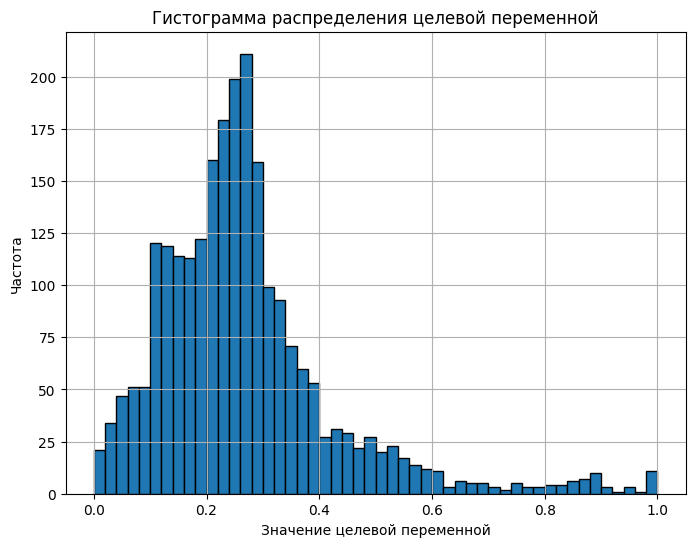

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['target'], bins=50, edgecolor='k')
plt.title("Гистограмма распределения целевой переменной")
plt.xlabel("Значение целевой переменной")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

## 6. (4 балл) Обучите модель линейной регрессии на рассматриваемых данных, написанную своими руками. Проиллюстрируйте работу модели графиком обучения и распределения целевой переменной. Выведите уравнение полученной гиперплоскости.

In [ ]:
class Model:
    def __init__(self):
        self.w0 = 0
        self.eps = 1e-4
        self.wi = np.array([])

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def predict(self, X):
        return X @ self.wi + self.w0

    def fit(self, X, Y, alpha=1, max_steps=50000):
        X = np.array(X)
        Y = np.array(Y)
        self.wi = np.array([0.0] * X.shape[1])
        step = 0
        steps, errors = [], []
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / X.shape[0]
            dJ1 = X.T @ (self.predict(X) - Y) / X.shape[0]
            self.w0 -= alpha * dJ0
            self.wi -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

        return steps, errors

In [ ]:
model = Model()
steps, errors = model.fit(X,Y, alpha = 0.001, max_steps = 100000)

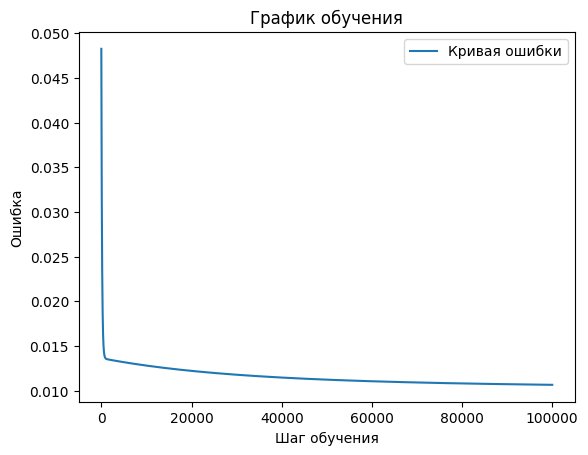

In [ ]:
plt.plot(errors,label = 'Кривая ошибки')
plt.xlabel("Шаг обучения")
plt.ylabel("Ошибка")
plt.title('График обучения')
plt.legend()
plt.show()

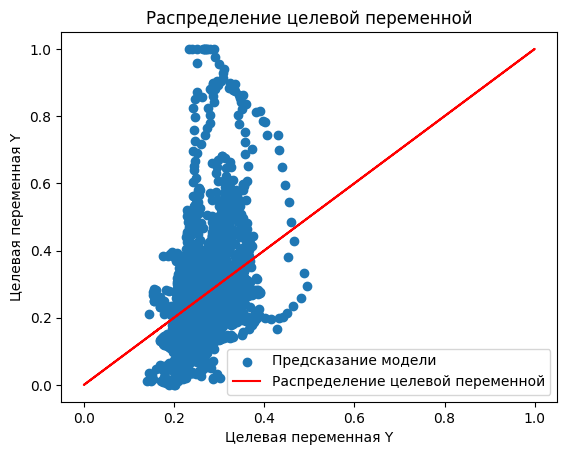

In [ ]:
plt.scatter(model.predict(X),Y, label = "Предсказание модели")
plt.plot(Y,Y,color = 'red', label = "Распределение целевой переменной")
plt.xlabel("Целевая переменная Y")
plt.ylabel("Целевая переменная Y")
plt.title('Распределение целевой переменной')
plt.legend()
plt.show()

In [ ]:
model.wi

array([ 0.20378302,  0.05048816, -0.18782645,  0.21874259, -0.16275412,
       -0.04048252, -0.02222786])

In [ ]:
model.w0

0.33739922991804955

### Уравнение гиперплоскости
Y = 0.33739922991804955 + 0.20378302 * X0 + 0.05048816 * X1 -0.18782645 * X2 + 0.21874259 * X3 -0.16275412 * X4 -0.04048252 * X5 -0.02222786 * X6

## 7. (2 балл) Обучите модель `LinearRegression()` линейной регрессии на рассматриваемых данных из библиотеки `sklearn`. Выведете уравнение полученной гиперплоскости. Убедитесь, что уравнения гиперплоскостей, полученных с помощью модели написанной своими руками и библиотечной, будут примерно одинаковыми.


In [ ]:
model_sklearn = LinearRegression()
model_sklearn.fit(X, Y)

LinearRegression()

In [ ]:
model_sklearn.coef_

array([ 0.45682435, -0.35544908, -0.13629323,  0.24935947, -0.53898827,
       -0.37327412,  0.49687799])

In [ ]:
model_sklearn.intercept_

0.6418924481821944

### Уравнение гиперплоскости
Y = 0.6418924481821944 + 0.45682435 * X0 -0.35544908 * X1 -0.13629323 * X2 + 0.24935947 * X3 -0.53898827 * X4 -0.37327412 * X5 + 0.49687799 * X6

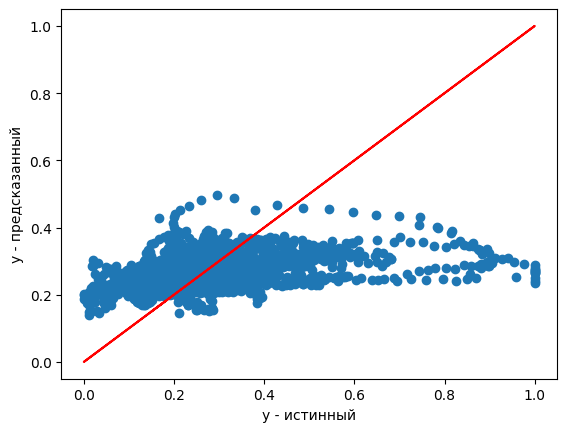

In [ ]:
y_pred = model.predict(X)
plt.scatter(Y, y_pred)
plt.plot(Y, Y, c='r')
plt.xlabel('y - истинный')
plt.ylabel('y - предсказанный')
plt.show()

## 8. (1 балл) Оцените работу моделей, рассчитав для каждой из них метрики: коэффициент детерминации и ошибку MSE. Сделайте выводы по качеству работы моделей.

In [ ]:
MSE = mean_squared_error(Y, model.predict(X))
MSE

0.021313651483918592

In [ ]:
MSE_sklearn = mean_squared_error(Y, model_sklearn.predict(X))
MSE_sklearn

0.019839300425659453

In [ ]:
r2 = r2_score(Y, model.predict(X))
r2

0.15597572859106323

In [ ]:
r2_sklearn = r2_score(Y, model_sklearn.predict(X))
r2_sklearn

0.21436028454981437

Библиотечная показала себя немного лучше, но обе модели получили хорошие результаты.